# A brief look into partisanship and cabinet approvals.

Since Trump took office in January, I have been closely following many of the cabinet appoinment and approval processes going on in the Senate. Most notably, I've noticed that there has been significant pushback among Senate Democrats against several of Trump's nominees, particularly Scott Pruitt, Betsy DeVos, Rex Tillerson, and Jeff Sessions. This got me wondering - has partisanship increased over time (which I assume it has), and if so, can that be seen through cabinet approvals?

Through data.world, I found a data set of Congressional voting results from 1981-2017 for president-appointed positions throughout the government. I filtered out positions to only be related to the 15 cabinet positions and other big-title positions - this includes positions such as "Secretary of State" as well as "Deputy Secretary of State," in addition to Director of CIA and Representative to the United Nations.

What I have found is that the spread of votes approving nominees for these positions has increased over time. Below, I have attempted to find some additional meaning in these results by looking at the Republican-Democrat balance in power in the Senate and Executive Office. In general, it appears that transitions of power in the Executive Branch bring about a wider spread of approval from the Senate, likely due to some idealogical pushback from members of the opposing party. For example, the Reagan-to-H.W. Bush transition of power brought about a very low standard deviation and high average votes of approval, while H.W. Bush to Clinton saw the opposite effect. However, from 2009 onwards, years with more than a couple position appointments have seen a steadly increasing spread of votes of approval.

Ultimately, more information is needed here to be more confident in the reasons behind the voting pattern we're seeing. While increased partisanship may be a factor, it very likely is not the only one. This sort of analysis can be susceptible to distortion, either due to numbers of votes in different administrations, circumstances or eras, or maybe due to treating a discrete variable (Executive power or Exec/Senate combo) as continuous.  Which suggests another variable or possible filter: looking only at new administrations or only at post-election replacements (whether new or second term). This quickly turns into a study of what to isolate for analysis, which is part of what makes it interesting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

/Users/johnsnyder/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import pandas as pd
df = pd.read_csv('output.csv')
pb = pd.read_csv('PartyBreakdown.csv')

In [3]:
df.head()

,year,date,role,name,vote,voteType
0,2017,1/24/17,Representative of the United States of America...,Nikki R. Haley,96,roll call
1,2017,1/24/17,the Representative of the United States of Ame...,Nikki R. Haley,96,roll call
2,2017,1/23/17,Director of the Central Intelligence Agency,Mike Pompeo,66,roll call
3,2017,1/20/17,Secretary of Homeland Security,John F. Kelly,88,roll call
4,2017,2/7/17,Secretary of Education,Elisabeth Prince DeVos,50,roll call


In [4]:
# First glance - Nikki Haley's listed twice - remove first one.
print df['role'].ix[0:1].unique()

[ 'Representative of the United States of America to the Sessions of the General Assembly of the United Nations during her tenure of service as Representative of the United States of America to the United Nations'
 'the Representative of the United States of America to the United Nations']


In [5]:
df = df.drop(0)

In [6]:
float(df.name.nunique())/len(df.name)

0.8005517010783249

In [7]:
cabinet_names = ['Secretary of State', 'Secretary of the Treasury', 'Secretary of Defense', 'Attorney General', 
                 'Secretary of the Interior', 'Secretary of Agriculture','Secretary of Commerce', 
                 'Secretary of Labor', 'Secretary of Health and Human Services',
                'Secretary of Housing and Urban Development', 'Secretary of Transportation',
                'Secretary of Energy', 'Secretary of Education', 'Secretary of Veterans Affairs',
                 'Secretary of Homeland Security', 'Central Intelligence Agency',
                 'Representative of the United States of America to the United Nations']

inauguration_years = {'Year': [1981, 1985, 1989, 1993, 1997, 2001, 2005, 2009, 2013, 2017],
                      'Party': ['R','R','R','D','D','R','R','D','D','R']}
inaugurations = pd.DataFrame(inauguration_years)

In [8]:
df_rc = df[df['voteType']=='roll call']

In [9]:
# Build out dataframe
df1 = pd.DataFrame()
for x in cabinet_names:
    df1 = pd.concat((df1, df_rc[df_rc['role'].str.contains(x)]), axis=0)

In [10]:
df1.role = df1.role.str.strip('an')

In [11]:
df1[df1.role == 'Secretary of State']

,year,date,role,name,vote,voteType
8,2017,2/1/17,Secretary of State,Rex W. Tillerson,56,roll call
836,2013,1/29/13,Secretary of State,John Forbes Kerry,94,roll call
2352,2009,1/21/09,Secretary of State,Hillary Rodham Clinton,94,roll call
3611,2005,1/26/05,Secretary of State,Condoleezza Rice,85,roll call
6468,1997,1/22/97,Secretary of State,Madeleine Korbel Albright,99,roll call
9514,1989,1/25/89,Secretary of State,James Addison Baker III,99,roll call


In [12]:
df2 = pd.merge(left=df1, right=pb, how='inner', left_on='year', right_on='Year')

In [13]:
df2

,year,date,role,name,vote,voteType,Year,Republican,Democrat,Other
0,2017,2/1/17,Secretary of State,Rex W. Tillerson,56,roll call,2017,52,46,2
1,2017,1/20/17,Secretary of Defense,James Mattis,98,roll call,2017,52,46,2
2,2017,2/8/17,Attorney General,Jeff Sessions,52,roll call,2017,52,46,2
3,2017,1/31/17,Secretary of Transportatio,Elaine L. Chao,93,roll call,2017,52,46,2
4,2017,2/7/17,Secretary of Educatio,Elisabeth Prince DeVos,50,roll call,2017,52,46,2
5,2017,1/20/17,Secretary of Homeland Security,John F. Kelly,88,roll call,2017,52,46,2
6,2017,1/23/17,Director of the Central Intelligence Agency,Mike Pompeo,66,roll call,2017,52,46,2
7,2017,1/24/17,the Representative of the United States of Ame...,Nikki R. Haley,96,roll call,2017,52,46,2
8,2014,12/16/14,Deputy Secretary of State,Antony Blinken,55,roll call,2014,45,53,2
9,2014,2/12/14,Assistant Secretary of State (Intelligence an...,Daniel Bennett Smith,98,roll call,2014,45,53,2


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 164
Data columns (total 10 columns):
year          165 non-null int64
date          165 non-null object
role          165 non-null object
name          165 non-null object
vote          165 non-null object
voteType      165 non-null object
Year          165 non-null int64
Republican    165 non-null int64
Democrat      165 non-null int64
Other         165 non-null int64
dtypes: int64(5), object(5)
memory usage: 14.2+ KB


In [15]:
# Convert vote series to number
df2.vote = df2.vote.convert_objects(convert_numeric=True)

/Users/johnsnyder/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 164
Data columns (total 10 columns):
year          165 non-null int64
date          165 non-null object
role          165 non-null object
name          165 non-null object
vote          165 non-null int64
voteType      165 non-null object
Year          165 non-null int64
Republican    165 non-null int64
Democrat      165 non-null int64
Other         165 non-null int64
dtypes: int64(6), object(4)
memory usage: 14.2+ KB


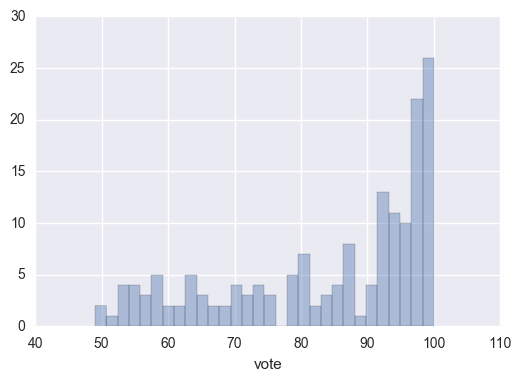

In [17]:
sns.distplot(df2.vote, kde=False, bins=30)

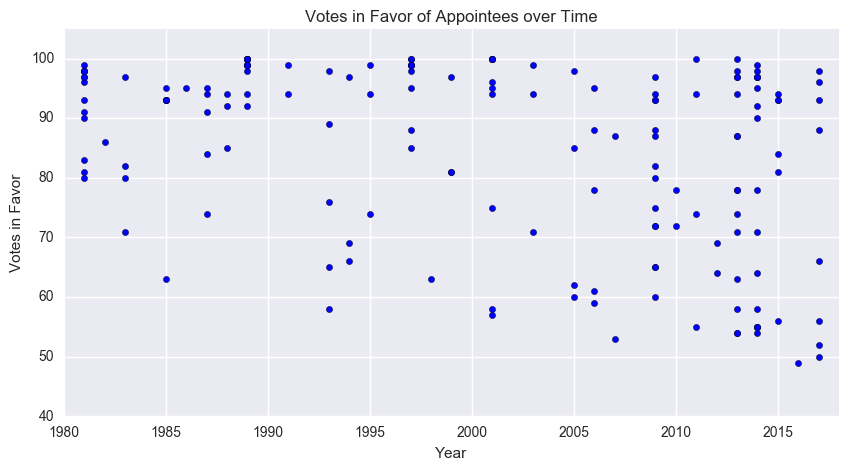

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(df2.year, df2.vote)
plt.xlim(1980,2018)
plt.ylim(40, 105)
plt.xlabel('Year')
plt.ylabel('Votes in Favor')
plt.title('Votes in Favor of Appointees over Time')

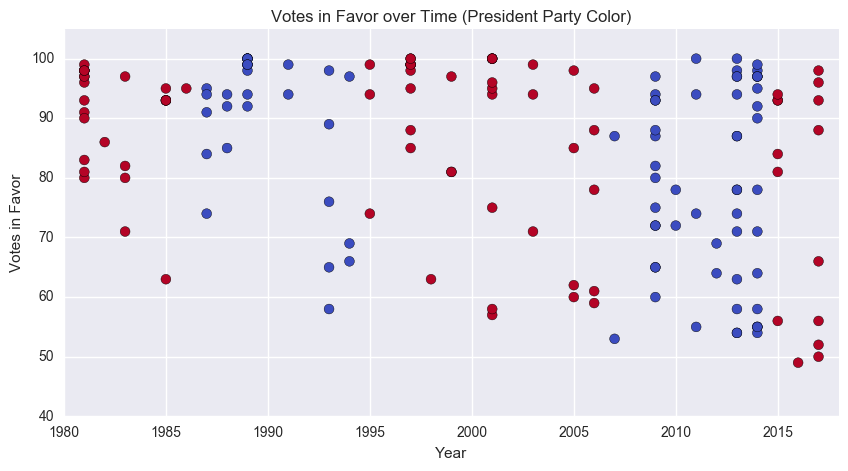

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(df2.year, df2.vote, c=df2.Republican>=50, cmap='coolwarm', s=50)
plt.xlim(1980,2018)
plt.ylim(40, 105)
plt.xlabel('Year')
plt.ylabel('Votes in Favor')
plt.title('Votes in Favor over Time (President Party Color)')

## We can also add a line of best fit to the graph, which does show a decreasing trend in approvals of cabinet appointees.

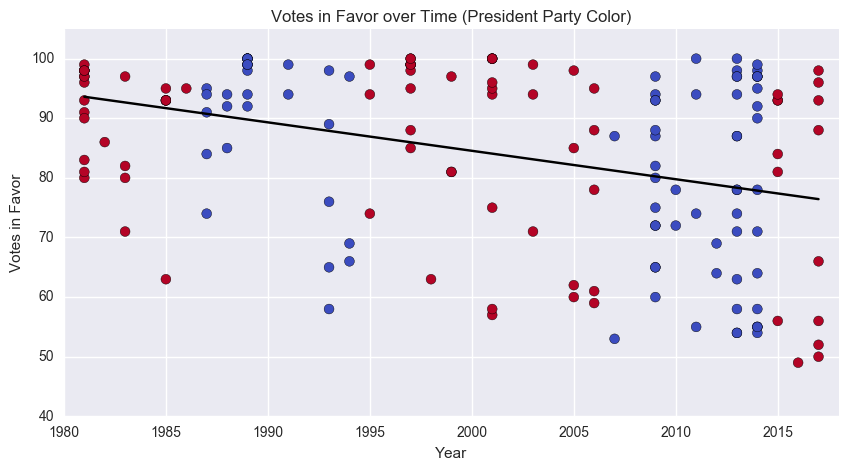

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(df2.year, df2.vote, c=df2.Republican>=50, cmap='coolwarm', s=50)
plt.xlim(1980,2018)
plt.ylim(40, 105)
plt.xlabel('Year')
plt.ylabel('Votes in Favor')
plt.title('Votes in Favor over Time (President Party Color)')
plt.plot(np.unique(df2.year), np.poly1d(np.polyfit(df2.year, df2.vote, 1))(np.unique(df2.year)), c='black')

In [21]:
inauguration_years.values()[0]

['R', 'R', 'R', 'D', 'D', 'R', 'R', 'D', 'D', 'R']

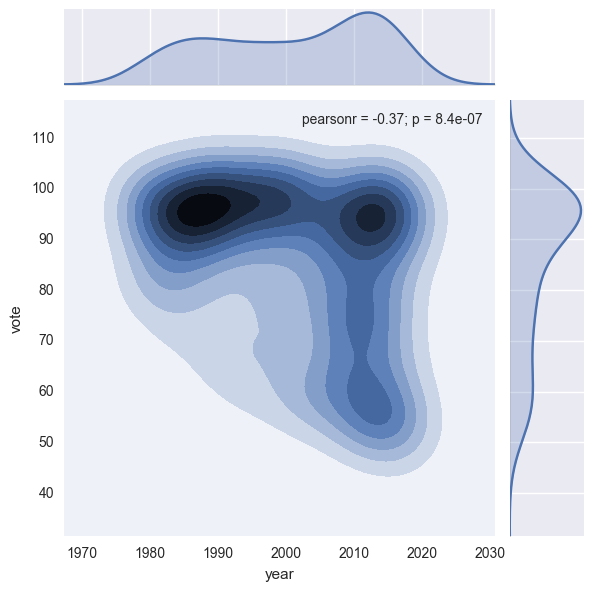

In [22]:
sns.jointplot(df2.year, df2.vote, kind='kde')

In [23]:
pb['R_Majority'] = pb['Republican'] - pb['Democrat']

In [24]:
vote_stats = pd.pivot_table(df2, index='Year', values='vote', fill_value=np.nan, aggfunc=(np.count_nonzero, np.mean, np.std, np.var))
vote_stats

,count_nonzero,mean,std,var
Year,,,,
1981,14,92.785714,6.806994,46.335165
1982,1,86.000000,NaN,NaN
1983,4,82.500000,10.785793,116.333333
1985,6,88.333333,12.436505,154.666667
1986,1,95.000000,NaN,NaN
1987,5,87.600000,8.734987,76.300000
1988,3,90.333333,4.725816,22.333333
1989,12,98.333333,2.605356,6.787879
1991,2,96.500000,3.535534,12.500000


In [25]:
vote_stats['Year'] = vote_stats.index
vote_stats = vote_stats.merge(pb[['Year','R_Majority']], on='Year')
columns = ['Year', 'R_Majority', 'count_nonzero', 'mean', 'std', 'var']
vote_stats = vote_stats[columns]
vote_stats

,Year,R_Majority,count_nonzero,mean,std,var
0,1981,7,14,92.785714,6.806994,46.335165
1,1982,7,1,86.000000,NaN,NaN
2,1983,10,4,82.500000,10.785793,116.333333
3,1985,6,6,88.333333,12.436505,154.666667
4,1986,6,1,95.000000,NaN,NaN
5,1987,-10,5,87.600000,8.734987,76.300000
6,1988,-10,3,90.333333,4.725816,22.333333
7,1989,-10,12,98.333333,2.605356,6.787879
8,1991,-12,2,96.500000,3.535534,12.500000
9,1993,-14,5,77.200000,16.513631,272.700000


In [26]:
vote_stats[vote_stats['count_nonzero']>1]

,Year,R_Majority,count_nonzero,mean,std,var
0,1981,7,14,92.785714,6.806994,46.335165
2,1983,10,4,82.500000,10.785793,116.333333
3,1985,6,6,88.333333,12.436505,154.666667
5,1987,-10,5,87.600000,8.734987,76.300000
6,1988,-10,3,90.333333,4.725816,22.333333
7,1989,-10,12,98.333333,2.605356,6.787879
8,1991,-12,2,96.500000,3.535534,12.500000
9,1993,-14,5,77.200000,16.513631,272.700000
10,1994,-14,3,77.333333,17.097758,292.333333
11,1995,4,3,89.000000,13.228757,175.000000


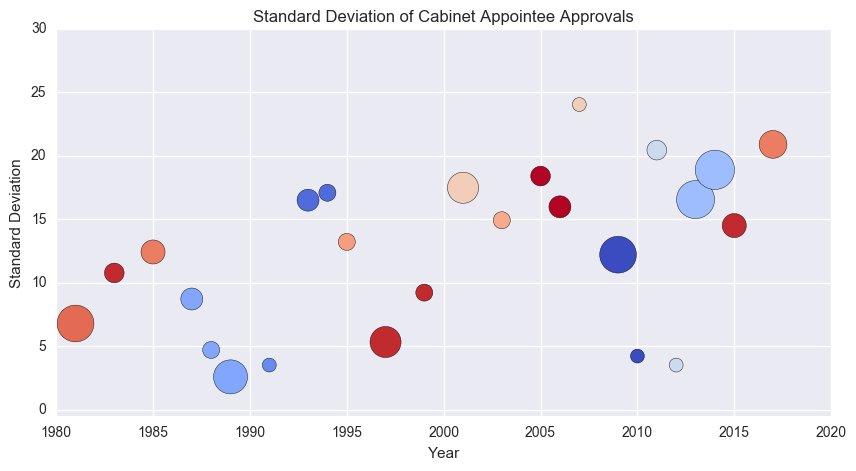

In [27]:
plt.figure(figsize=(10,5))
plt.scatter(x=vote_stats['Year'], y=vote_stats['std'], c=vote_stats['R_Majority'], cmap='coolwarm',\
            s = vote_stats['count_nonzero']*50)
plt.title('Standard Deviation of Cabinet Appointee Approvals')
plt.xlim(1980,2020)
plt.ylim(-0.5)
plt.xlabel('Year')
plt.ylabel('Standard Deviation')

## Standard deviation of votes of approval for nominees each year has increased over time, most notably following the election in 2000.

## In the plot below, I've added the party results of presidential elections every four years.

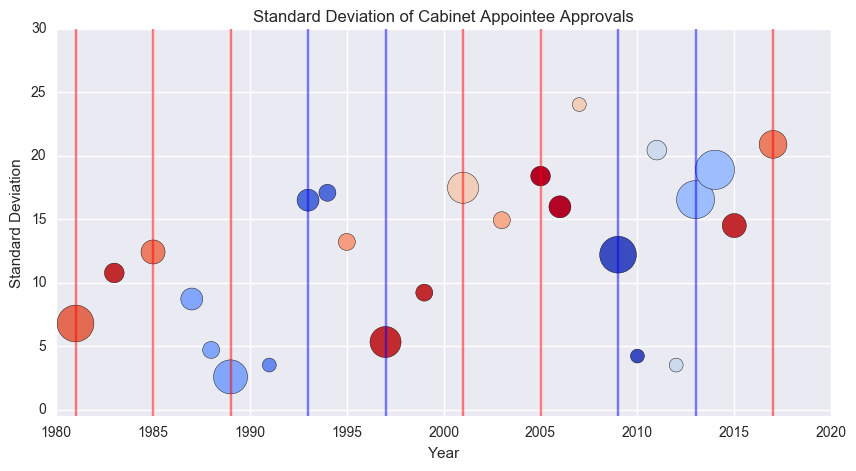

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(x=vote_stats['Year'], y=vote_stats['std'], c=vote_stats['R_Majority'], cmap='coolwarm',\
            s = vote_stats['count_nonzero']*50)
plt.title('Standard Deviation of Cabinet Appointee Approvals')
plt.xlim(1980,2020)
plt.ylim(-0.5)
plt.xlabel('Year')
plt.ylabel('Standard Deviation')
for t in range(len(inauguration_years.values()[0])):
    if inauguration_years.values()[0][t] == 'R':
        plt.axvline(inauguration_years.values()[1][t], c= 'r', alpha=0.5)
    else:
        plt.axvline(inauguration_years.values()[1][t], c= 'b', alpha=0.5)

## From 1981 until around 2005, it looks like there is a higher standard deviation following changes in power in the Executive Branch - H.W. Bush to Clinton in 1993, Clinton to Bush in 2001. When Executive power remains in one party following an election (Reagan to H.W. Bush, or re-elections), standard deviation _generally_ decreases or remains about the same.

## However, this does not hold true following Obama's election in 2008. From 2009 onwards, years with more than a couple position appointments have seen a steadly increasing spread of votes of approval. While there is a drop in standard deviation in 2009 compared to the W. Bush years, there is also a strongly blue senate (i.e. strong Democratic control). This may be a reason for such a decrease. That said, standard deviation largely continues to increase from then onwards.

## Finally, we can apply the same plotting style to the average voting results for cabinet appointments each year. There is a fairly steady decline in average votes of approval, though the mean has remained around the same range from 2005-2017.

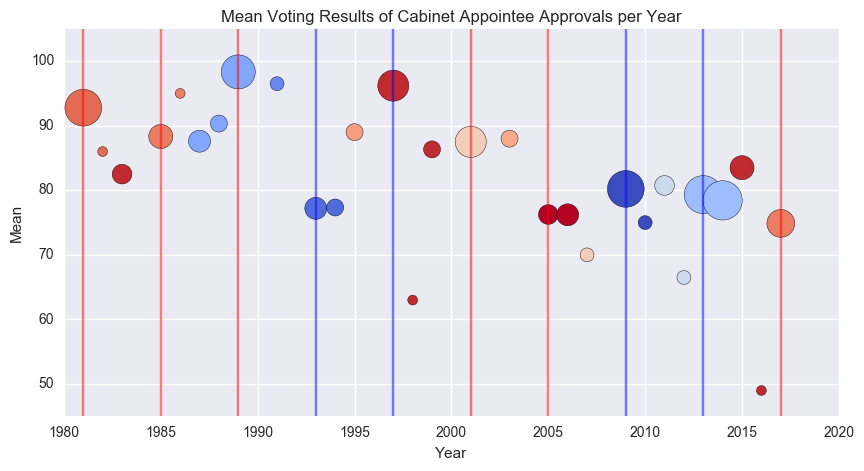

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(x=vote_stats['Year'], y=vote_stats['mean'], c=vote_stats['R_Majority'], cmap='coolwarm',\
            s = vote_stats['count_nonzero']*50)
plt.title('Mean Voting Results of Cabinet Appointee Approvals per Year')
plt.xlim(1980,2020)
plt.ylim(45,105)
plt.xlabel('Year')
plt.ylabel('Mean')
for t in range(len(inauguration_years.values()[0])):
    if inauguration_years.values()[0][t] == 'R':
        plt.axvline(inauguration_years.values()[1][t], c= 'r', alpha=0.5)
    else:
        plt.axvline(inauguration_years.values()[1][t], c= 'b', alpha=0.5)

## For easier comparison, here are the two plots directly next to each other.

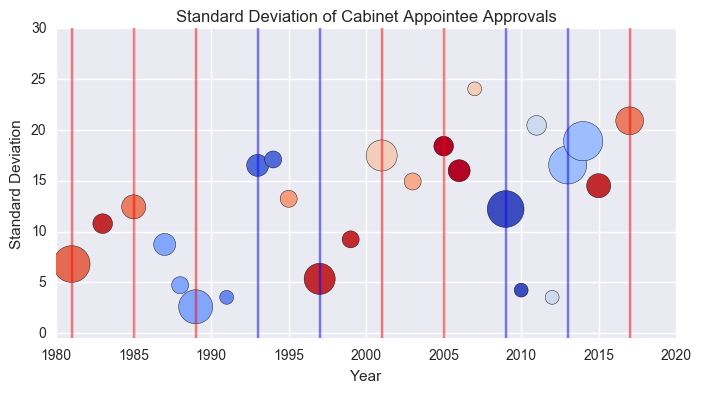

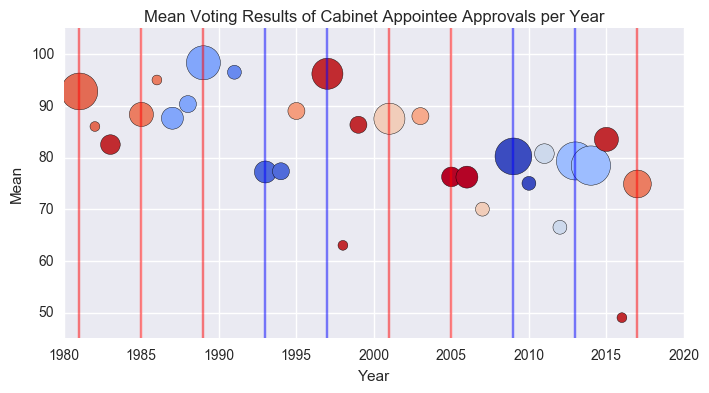

In [30]:
plt.figure(figsize=(8,4))
plt.scatter(x=vote_stats['Year'], y=vote_stats['std'], c=vote_stats['R_Majority'], cmap='coolwarm',\
            s = vote_stats['count_nonzero']*50)
plt.title('Standard Deviation of Cabinet Appointee Approvals')
plt.xlim(1980,2020)
plt.ylim(-0.5)
plt.xlabel('Year')
plt.ylabel('Standard Deviation')
for t in range(len(inauguration_years.values()[0])):
    if inauguration_years.values()[0][t] == 'R':
        plt.axvline(inauguration_years.values()[1][t], c= 'r', alpha=0.5)
    else:
        plt.axvline(inauguration_years.values()[1][t], c= 'b', alpha=0.5)
        
plt.figure(figsize=(8,4))
plt.scatter(x=vote_stats['Year'], y=vote_stats['mean'], c=vote_stats['R_Majority'], cmap='coolwarm',\
            s = vote_stats['count_nonzero']*50)
plt.title('Mean Voting Results of Cabinet Appointee Approvals per Year')
plt.xlim(1980,2020)
plt.ylim(45,105)
plt.xlabel('Year')
plt.ylabel('Mean')
for t in range(len(inauguration_years.values()[0])):
    if inauguration_years.values()[0][t] == 'R':
        plt.axvline(inauguration_years.values()[1][t], c= 'r', alpha=0.5)
    else:
        plt.axvline(inauguration_years.values()[1][t], c= 'b', alpha=0.5)